## Contributors
### Jay Upadhyay
### 
###
###
###

# Libraries

In [8]:
from tensorflow import keras
from keras import utils
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import numpy as np
import h5py


In [9]:
from astroNN.datasets import load_galaxy10

with h5py.File('Galaxy10_DECals.h5', 'r') as F:
    images = np.array(F['images'])
    labels = np.array(F['ans'])

# 1. Project Proposal


# 2. Data Collection and data cleaning


In [10]:
# To convert the labels to categorical 10 classes
labels = utils.to_categorical(labels, 10)


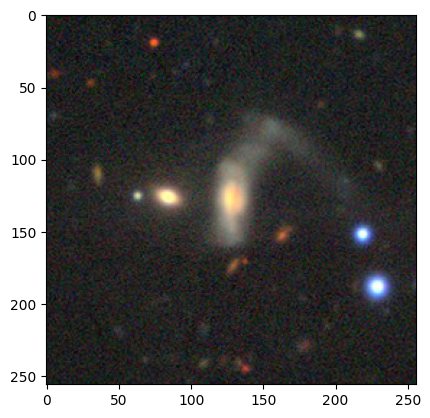

In [22]:
rand_list=[]

for i in range(5):
    rand_list.append(random.randint(0,images.shape[0]))
rand_list
plt.imshow(images[0])
# for x in rand_list:
#     plt.imshow(images[x])

# 3. EDA

In [12]:
images.shape
# The 21785 says there are that many images
# 69 says the pixels in the images(69x69)
# The 3 shows the bands(g,r,z) 

(17736, 256, 256, 3)

In [13]:
# To convert to desirable type
labels = labels.astype(np.float32)
images = images.astype(np.float32)

In [19]:
images[0]

array([[[0.26666668, 0.07450981, 0.09019608],
        [0.22745098, 0.06666667, 0.12941177],
        [0.15686275, 0.0627451 , 0.15686275],
        ...,
        [0.2       , 0.18039216, 0.16862746],
        [0.15686275, 0.16078432, 0.12941177],
        [0.10980392, 0.14901961, 0.11764706]],

       [[0.23921569, 0.15686275, 0.14509805],
        [0.20392157, 0.16862746, 0.17254902],
        [0.11372549, 0.15294118, 0.16078432],
        ...,
        [0.10980392, 0.11764706, 0.16470589],
        [0.10980392, 0.1254902 , 0.13725491],
        [0.12941177, 0.15686275, 0.12941177]],

       [[0.11764706, 0.12156863, 0.09803922],
        [0.09411765, 0.16078432, 0.12941177],
        [0.05882353, 0.1764706 , 0.12941177],
        ...,
        [0.08235294, 0.13725491, 0.1882353 ],
        [0.09803922, 0.13725491, 0.1764706 ],
        [0.14509805, 0.16078432, 0.15686275]],

       ...,

       [[0.10980392, 0.1254902 , 0.13725491],
        [0.10588235, 0.12156863, 0.1254902 ],
        [0.16470589, 0

In [15]:
images=images/255


In [16]:
images[0]

array([[[0.26666668, 0.07450981, 0.09019608],
        [0.22745098, 0.06666667, 0.12941177],
        [0.15686275, 0.0627451 , 0.15686275],
        ...,
        [0.2       , 0.18039216, 0.16862746],
        [0.15686275, 0.16078432, 0.12941177],
        [0.10980392, 0.14901961, 0.11764706]],

       [[0.23921569, 0.15686275, 0.14509805],
        [0.20392157, 0.16862746, 0.17254902],
        [0.11372549, 0.15294118, 0.16078432],
        ...,
        [0.10980392, 0.11764706, 0.16470589],
        [0.10980392, 0.1254902 , 0.13725491],
        [0.12941177, 0.15686275, 0.12941177]],

       [[0.11764706, 0.12156863, 0.09803922],
        [0.09411765, 0.16078432, 0.12941177],
        [0.05882353, 0.1764706 , 0.12941177],
        ...,
        [0.08235294, 0.13725491, 0.1882353 ],
        [0.09803922, 0.13725491, 0.1764706 ],
        [0.14509805, 0.16078432, 0.15686275]],

       ...,

       [[0.10980392, 0.1254902 , 0.13725491],
        [0.10588235, 0.12156863, 0.1254902 ],
        [0.16470589, 0

In [5]:
X_train,X_test=train_test_split(images, test_size=0.2)
Y_train,Y_test=train_test_split(labels, test_size=0.2)

In [ ]:
# model=Sequential()
# model.add(Conv2D(32,kernel_size=3,activation="tanh",input_shape=X_train[0].shape))
# model.add(MaxPooling2D((2, 2)))
#model.add(Flatten())
# model.add(Dense(10))

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10))

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
history = model.fit(X_train.resize(-1,1), Y_train, 
                    epochs=5
                )

In [ ]:
model.evaluate(X_test,Y_test)

# 4. Techniques Used

# 5. Project Proposal